<a href="https://colab.research.google.com/github/hoashalarajh/python-code/blob/main/Coursera_Build_train_CNN_CIFAR10_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1. Import Tensorflow and other helper libraries

# make sure tensorflow is installed; uncomment the line before if you need to
# pip install tensorflow

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models  #this is a new dependency!
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


From https://www.cs.toronto.edu/~kriz/cifar.html:
"The CIFAR-10 dataset consists of 60000 color images in 10 classes, with 6000 images per class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks."

In [2]:
# Step 2. Load the CIFAR-10 data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Step 3. Pre-process and Explore the data

# Pre-process the data: convert pixel intensities to double values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Write code to check the data has the correct shape/dimension
# Insert your code below

print (f"Shape of x_train is : {x_train.shape}\n")
print (f"Shape of x_test is : {x_test.shape}\n")




Shape of x_train is : (50000, 32, 32, 3)

Shape of x_test is : (10000, 32, 32, 3)



In [4]:
# Step 4. Build the tf.keras.Sequential model by stacking layers.

# A. Create an "empty" sequential model and then add layers, one by one
# B. Add a Conv2D layer with the following characteristics:
#      - 32 output filters
#      - each of size 5 by 5
#      - use the Rectified Linear Unit as a non-linear activation function
#      - no padding
#      - the input shape is the same as the size of each of the images in the data set
# C. Add a maxpooling layer with the following characteristics:
#      - pool size is 2 by 2
#      - stride is 1
#      - no padding

# Don't add any flatten or fulley connected layers at the end!

# Insert your code below:

model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (5,5), activation = "relu", input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2), strides = 1))

In [5]:
# Once a model is "built", you can call its summary() method to display its contents:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Step 5. Add more layers.

# A. Add a Conv2D layer with the following characteristics:
#      - 32 output filters
#      - each of size 3 by 3
#      - use the Rectified Linear Unit as a non-linear activation function
#      - no padding
#      - the input shape is the size of the output shape from the last maxpooling layer
# B. Add a maxpooling layer with the following characteristics:
#      - pool size is 2 by 2
#      - stride is 2
#      - no padding

# Don't add any flatten or fulley connected layers at the end!

# Insert your code below:

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (27, 27, 32)))
model.add(layers.MaxPooling2D((2,2), strides = 2))

In [7]:
# Once a model is "built", you can call its summary() method to display its contents:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Adding one more convolutional layer, one flatten layer and two dense layers

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(10))# last layer should be the size of the output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 6400)              0

In [9]:
from keras_visualizer import visualizer
visualizer(model, format='png', view=True)

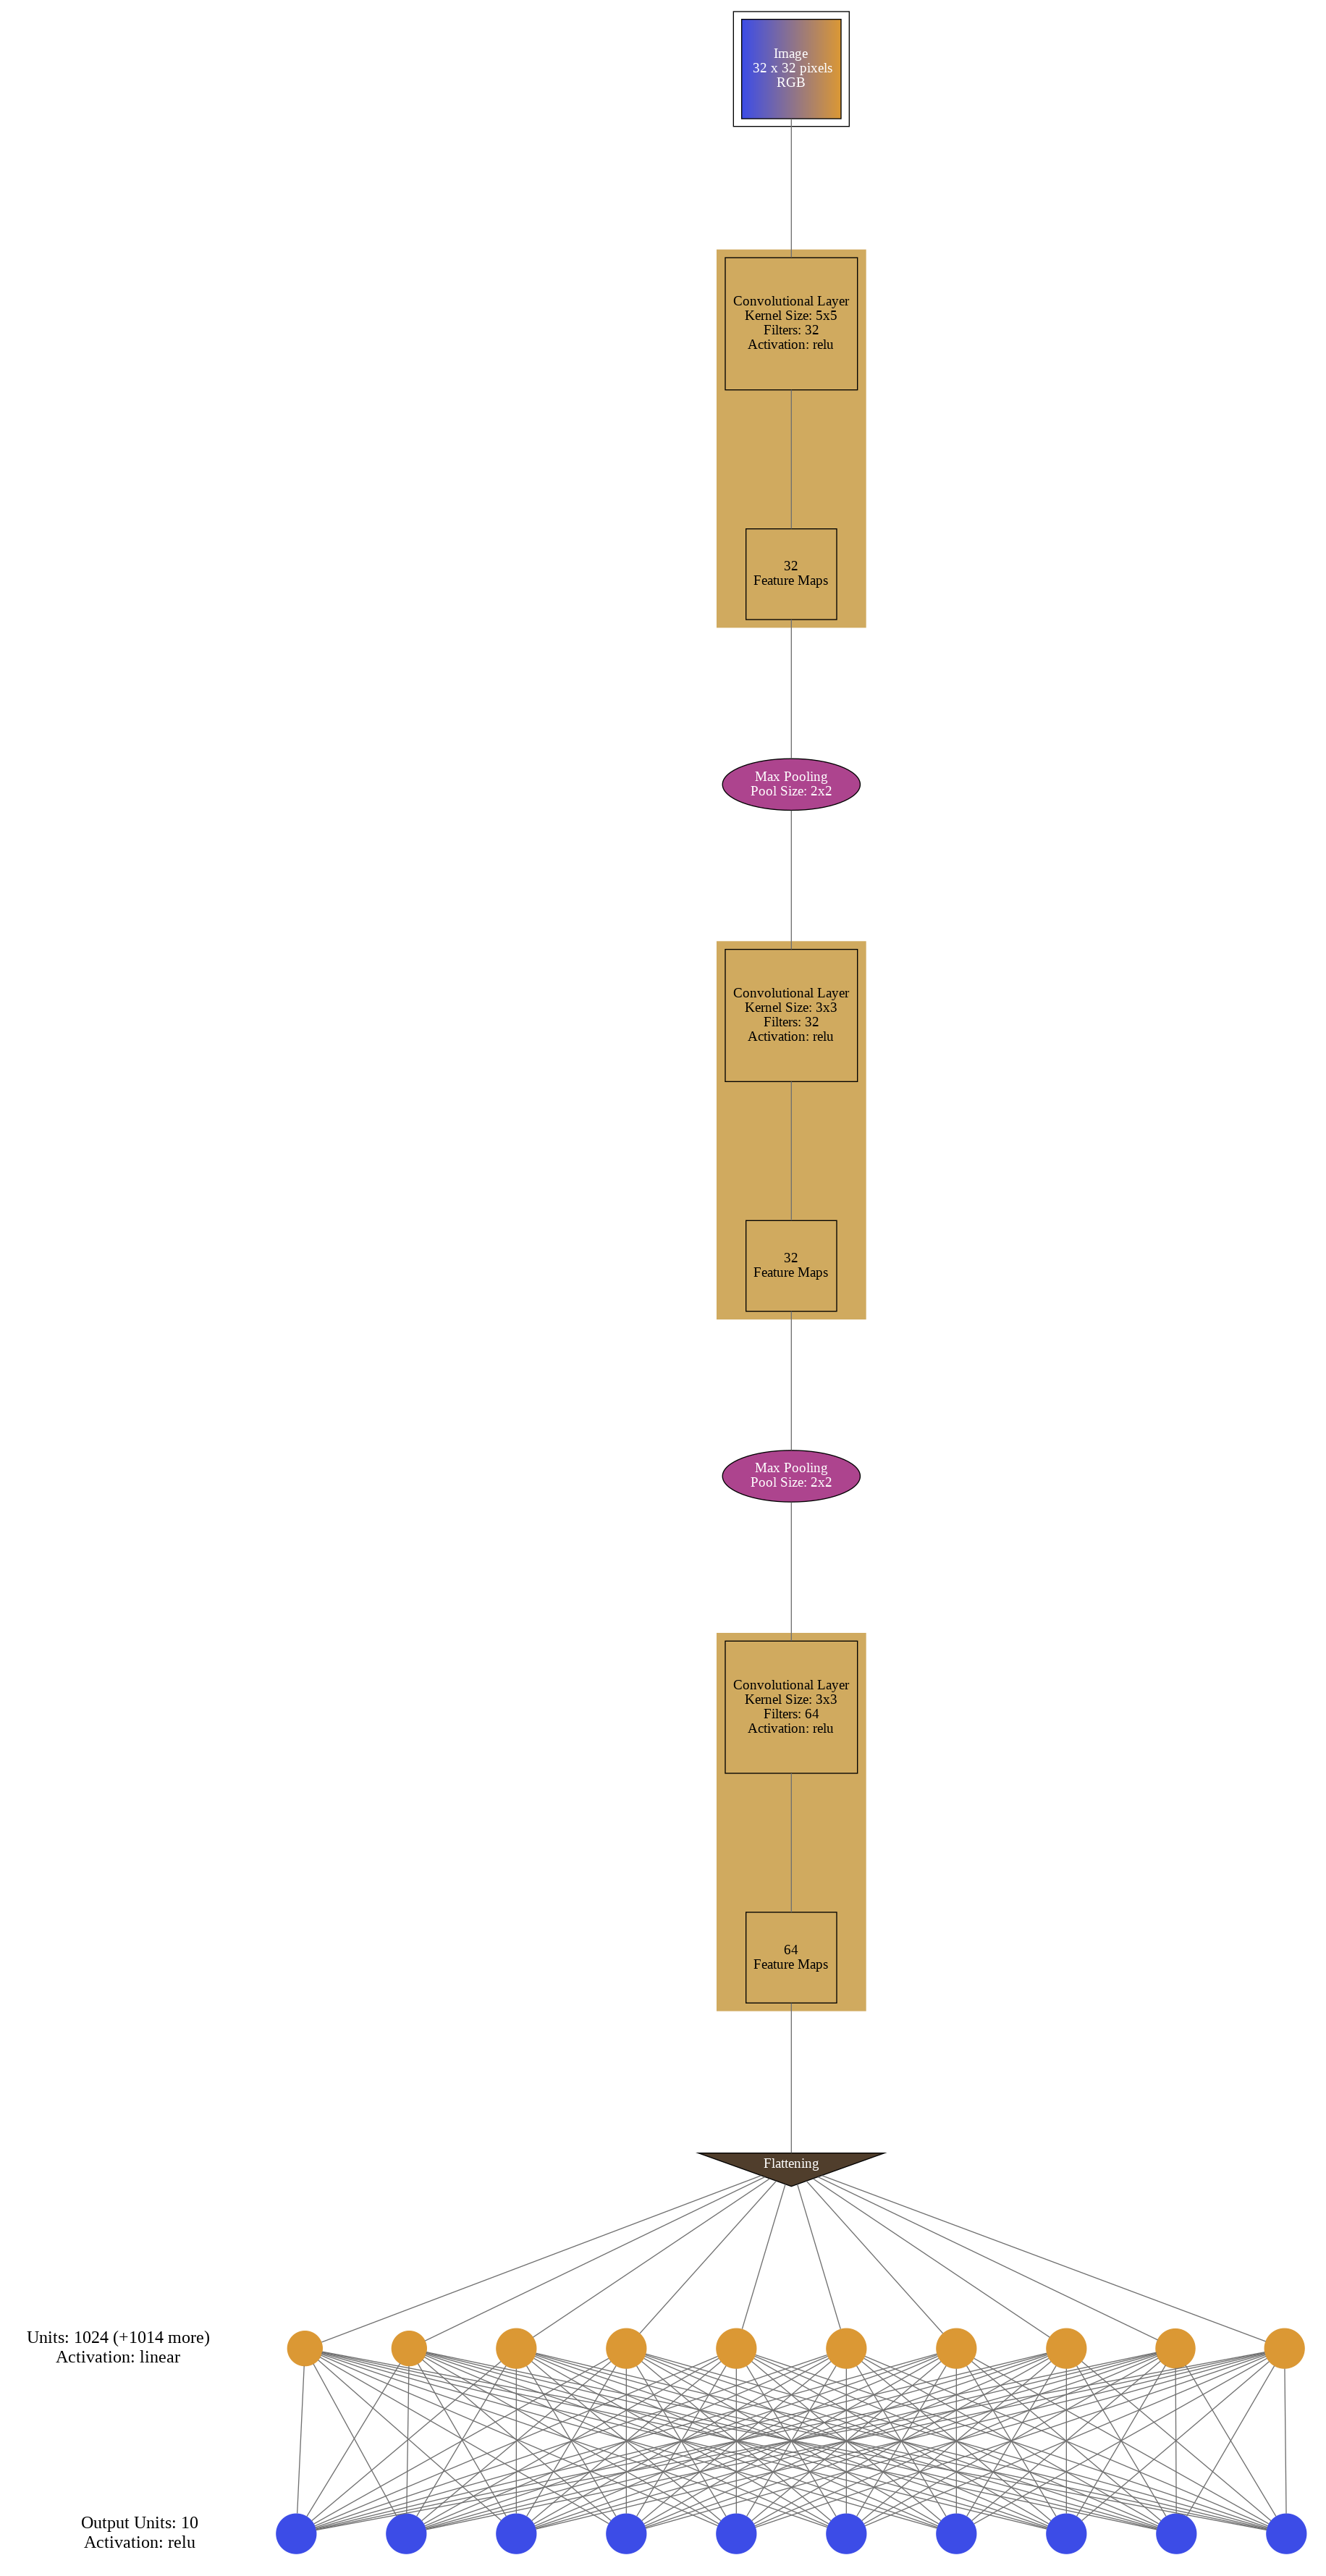

In [10]:
import cv2
from google.colab.patches import cv2_imshow
cnn_architecture = cv2.imread("graph.png")
cnn_architecture = cv2.cvtColor(cnn_architecture, cv2.COLOR_BGR2RGB)
cv2_imshow(cnn_architecture)

In [11]:
# For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.
# pass 1 training data image to the model and convert the predictions into a numpy array
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.03426501,  0.47535884,  0.04296178, -0.34978545,  0.11270616,
         0.16303515, -0.10227598, -0.20175101,  0.24517739,  0.06204128]],
      dtype=float32)

In [12]:
# Use the tf.nn.softmax function to convert these logits into "probabilities" for each class:
tf.nn.softmax(predictions).numpy()


array([[0.09626145, 0.14962943, 0.09710226, 0.06556339, 0.10411634,
        0.10949053, 0.08397566, 0.07602422, 0.11886403, 0.09897272]],
      dtype=float32)

In [13]:
# Choose an optimizer and loss function for training

# Deep learning neural networks are trained using the stochastic gradient descent optimization 
# algorithm. As part of the optimization algorithm, the error for the current state of the 
# model must be estimated repeatedly. This requires the choice of an error function, 
# conventionally called a loss function, that can be used to estimate the loss of the model so 
# that the weights can be updated to reduce the loss on the next evaluation.

# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and 
# returns a scalar loss for each example.

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# This loss is equal to the negative log probability of the true class: It is zero if the model 
# is sure of the correct class. This untrained model gives probabilities close to random
# (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

loss_fn(y_train[:1], predictions).numpy()

2.4772284

In [14]:
# Step 6: Ready to compile! 
# optimizer parameter = 'adam'. Other optimizer options here: 
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# loss = the name of the loss function
# Typically you will use metrics=['accuracy']
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

# Task: call the model.fit method to train the model for 10 iterations

# Insert your code below:

history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5472 - accuracy: 0.4411 - val_loss: 1.3376 - val_accuracy: 0.5178
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2530 - accuracy: 0.5544 - val_loss: 1.2696 - val_accuracy: 0.5570
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1171 - accuracy: 0.6069 - val_loss: 1.1430 - val_accuracy: 0.6048
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0175 - accuracy: 0.6429 - val_loss: 1.3199 - val_accuracy: 0.5610
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9454 - accuracy: 0.6696 - val_loss: 1.0676 - val_accuracy: 0.6398
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8765 - accuracy: 0.6930 - val_loss: 1.0715 - val_accuracy: 0.6310
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8212 - accuracy: 0.7124 - val_loss: 1.0848 - val_accura

313/313 - 1s - loss: 1.1841 - accuracy: 0.6381 - 849ms/epoch - 3ms/step


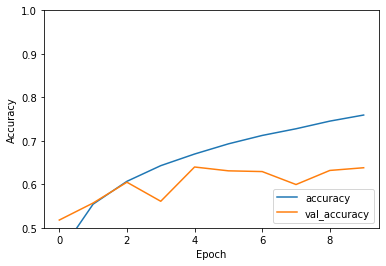

In [15]:
# plot training vs testing accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [16]:
# Step 7a. Evaluate the model: compare how the model performs on the test dataset

# The Model.evaluate method checks the models performance, usually on a "Validation-set" 
# or "Test-set".

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc * 100)

313/313 - 1s - loss: 1.1841 - accuracy: 0.6381 - 863ms/epoch - 3ms/step

Test accuracy: 63.81000280380249


In [17]:
# 8. Make predictions

# If you want your model to return a probability, you can wrap the trained model, and attach 
# the softmax classifier to it:

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:10])# test the first 10 images
print(predictions.shape)
predictions[0]


1/1 [==============================] - 0s 138ms/step
(10, 10)


array([6.8165688e-04, 9.7480067e-04, 1.7794129e-02, 8.1580974e-02,
       1.1956952e-01, 4.4605973e-01, 1.7873719e-01, 3.9470184e-04,
       1.5200913e-01, 2.1982172e-03], dtype=float32)

In [18]:
# Apply a label and compare with the test label

print(np.argmax(predictions, axis = 1))
print(y_test[:10])


[5 8 1 0 4 6 1 6 7 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


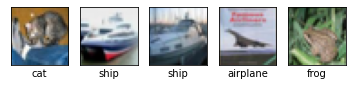

In [19]:
# View the first five images, to check the validity of the labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i][0]])
plt.show() 

**End of assignment**